In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X =iris.data
y=iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [2]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.
C:\Users\lmrla\.conda\envs\TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lmrla\.conda\envs\TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lmrla\.conda\envs\TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lmrla\.conda\envs\TF1\lib\site-packages\tensorflow\py

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
model= models.Sequential()
model.add(layers.Dense(8,input_shape=(4,)))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(16,activation="relu"))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation="relu"))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(3,activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 827
Trainable params: 827
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
history = model.fit(X_train,y_train,validation_split=0.4,epochs=80)

Train on 45 samples, validate on 30 samples
Epoch 1/80
45/45 [==============================] - 0s 5ms/sample - loss: 1.3103 - acc: 0.1778 - val_loss: 1.1085 - val_acc: 0.3000
Epoch 2/80
45/45 [==============================] - 0s 178us/sample - loss: 1.1300 - acc: 0.3111 - val_loss: 1.1260 - val_acc: 0.3000
Epoch 3/80
45/45 [==============================] - 0s 156us/sample - loss: 1.0549 - acc: 0.4000 - val_loss: 1.1528 - val_acc: 0.3000
Epoch 4/80
45/45 [==============================] - 0s 133us/sample - loss: 1.0103 - acc: 0.4000 - val_loss: 1.1070 - val_acc: 0.3000
Epoch 5/80
45/45 [==============================] - 0s 156us/sample - loss: 0.9792 - acc: 0.4000 - val_loss: 1.0919 - val_acc: 0.3333
Epoch 6/80
45/45 [==============================] - 0s 156us/sample - loss: 0.9504 - acc: 0.4222 - val_loss: 1.1019 - val_acc: 0.4667
Epoch 7/80
45/45 [==============================] - 0s 133us/sample - loss: 0.9231 - acc: 0.6000 - val_loss: 1.0967 - val_acc: 0.5000
Epoch 8/80
45/45 [==

45/45 [==============================] - 0s 178us/sample - loss: 0.3125 - acc: 0.8444 - val_loss: 0.5396 - val_acc: 0.5667
Epoch 62/80
45/45 [==============================] - 0s 133us/sample - loss: 0.3067 - acc: 0.8667 - val_loss: 0.5368 - val_acc: 0.5667
Epoch 63/80
45/45 [==============================] - 0s 200us/sample - loss: 0.2984 - acc: 0.8667 - val_loss: 0.5711 - val_acc: 0.5333
Epoch 64/80
45/45 [==============================] - 0s 156us/sample - loss: 0.2914 - acc: 0.8444 - val_loss: 0.5708 - val_acc: 0.5333
Epoch 65/80
45/45 [==============================] - 0s 155us/sample - loss: 0.2880 - acc: 0.8444 - val_loss: 0.5704 - val_acc: 0.5333
Epoch 66/80
45/45 [==============================] - 0s 222us/sample - loss: 0.2867 - acc: 0.8222 - val_loss: 0.5156 - val_acc: 0.6667
Epoch 67/80
45/45 [==============================] - 0s 133us/sample - loss: 0.2862 - acc: 0.8889 - val_loss: 0.5459 - val_acc: 0.5667
Epoch 68/80
45/45 [==============================] - 0s 156us/sampl

In [7]:
results = model.evaluate(X_test,y_test)

75/75 [==============================] - 0s 93us/sample - loss: 0.3936 - acc: 0.7867


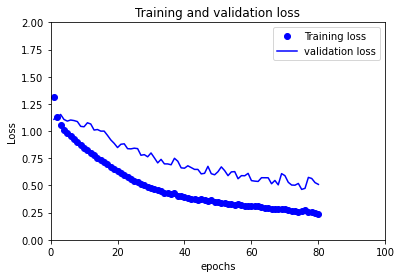

In [8]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.axis([0,100,0.0,2.0])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

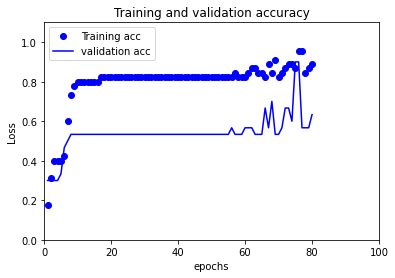

In [9]:
history_dict = history.history
loss = history_dict['acc']
val_loss = history_dict['val_acc']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training acc')
plt.plot(epochs,val_loss,'b',label='validation acc')
plt.title('Training and validation accuracy')
plt.axis([0,100,0.0,1.1])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()